### Breast Cancer Wisconsin Dataset

This dataset is available as part of the datasets' database on ```scikit-learn```.

Data was collected from 569 digitized image of a fine needle aspirate (FNA) of a breast mass. For each FNA image, 30 features were automatically extracted, including: average cell radius, average cell texture, average cell perimeter, average cell area, average cell smoothness, and 25 others.

Let's load the dataset for a full description:

In [61]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [62]:
data = load_breast_cancer(return_X_y=False)

In [63]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

A subset of these 569 samples are labeled as malignant and others as benign.

In [64]:
# 0 - Malignant, 1 - benign
target = data.target

np.unique(target)

array([0, 1])

In [65]:
print('There are ',np.sum(target==0),' samples labeled as malignant')
print('There are ',np.sum(target==1),' samples labeled as benign')

There are  212  samples labeled as malignant
There are  357  samples labeled as benign


For this problem, let's consider the first two features only. Those are the radius and texture:

In [66]:
X = data.data[:,0:2]

print(X.shape)

(569, 2)


The matrix X contains all samples for these 2 features. We can further separate them into malignant samples and benign samples:

In [67]:
X_mal = X[target==0,:]
X_ben = X[target==1,:]

print(X_mal.shape, X_ben.shape)

(212, 2) (357, 2)


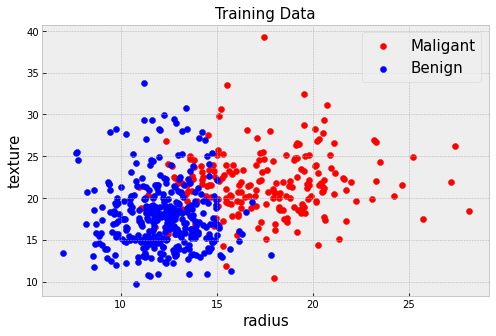

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(X_mal[:,0], X_mal[:,1], c='r',label='Maligant')
plt.scatter(X_ben[:,0], X_ben[:,1], c='b',label='Benign')
plt.legend(fontsize=15); plt.title('Training Data', size=15)
plt.xlabel('radius',size=15)
plt.ylabel('texture', size=15);

1. Compute the MLE estimate for the mean and covariance matrix for both classes.

2. Compute the prior probabilities for both classes.

3. Compute and display (using ```imshow```) the data likelihood for both classes.

4. Compute the posterior distribution for both classes, and plot the decision boundary.

5. Suppose that the hospital collected another FNA and measured an average radius of 18 and an average texture of 22. Using your classifier, how would you classify that new point? How confident are you in that decision?

6. Consider another new sample with radius 30 and texture 30. What classification would you report back to the doctor? How confident are you in that decision?

In [99]:
#### Estimate parameters
# Means
mu1 = np.mean(X_mal, axis=0) 
print('Mean of Malignant Class: ', mu1)
mu2 = np.mean(X_ben, axis=0) 
print('Mean of Benign Class: ', mu2)
# Covariances
cov1 = np.cov(X_mal.T)
print('Covariance of Malignant Class: ',cov1)
cov2 = np.cov(X_ben.T)
print('Covariance of Benign Class: ',cov2)

#### Estimate Prior Probabilities
NM = X_mal.shape[0]
NB = X_ben.shape[0]
N = NB + NM
p1 = NB/N
print('Probability of Malignant Class: ',p1) 
p2 = NM/N
print('Probability of Benign Class: ',p2)

Mean of Malignant Class:  [17.46283019 21.60490566]
Mean of Benign Class:  [12.14652381 17.9147619 ]
Covariance of Malignant Class:  [[10.26543081  1.28984055]
 [ 1.28984055 14.28439288]]
Covariance of Benign Class:  [[ 3.17022172 -0.26426039]
 [-0.26426039 15.96102052]]
Probability of Malignant Class:  0.6274165202108963
Probability of Benign Class:  0.37258347978910367


/var/folders/sd/rhy8vt5d6pbgxs21z95g2qnw0000gn/T/ipykernel_1158/3586748976.py:14: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/var/folders/sd/rhy8vt5d6pbgxs21z95g2qnw0000gn/T/ipykernel_1158/3586748976.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


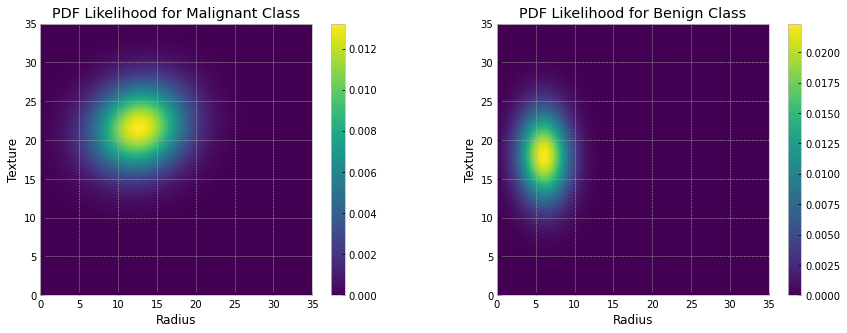

In [130]:
from scipy.stats import multivariate_normal # multivariate form of stats.norm
# Compute a grid of values for x and y
grid = 35
x = np.linspace(7.5, grid, 100)
y = np.linspace(0, grid, 100)
xm, ym = np.meshgrid(x, y)
X = np.flip(np.dstack([xm,ym]),axis=0)
# Let's plot the probabaility density function (pdf) for each class
y1 = multivariate_normal.pdf(X, mean=mu1, cov=cov1) #P(x|C1)
y2 = multivariate_normal.pdf(X, mean=mu2, cov=cov2) #P(x|C2)
fig =plt.figure(figsize=(15,5)) 
fig.add_subplot(1,2,1)
plt.imshow(y1, extent=[0,grid,0,grid]) 
plt.colorbar()
plt.xlabel('Radius'); 
plt.ylabel('Texture') 
plt.title('PDF Likelihood for Malignant Class')
fig.add_subplot(1,2,2)
plt.imshow(y2, extent=[0,grid,0,grid]) 
plt.colorbar()
plt.xlabel('Radius'); 
plt.ylabel('Texture') 
plt.title('PDF Likelihood for Benign Class');

/var/folders/sd/rhy8vt5d6pbgxs21z95g2qnw0000gn/T/ipykernel_1158/327605512.py:7: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()
/var/folders/sd/rhy8vt5d6pbgxs21z95g2qnw0000gn/T/ipykernel_1158/327605512.py:13: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


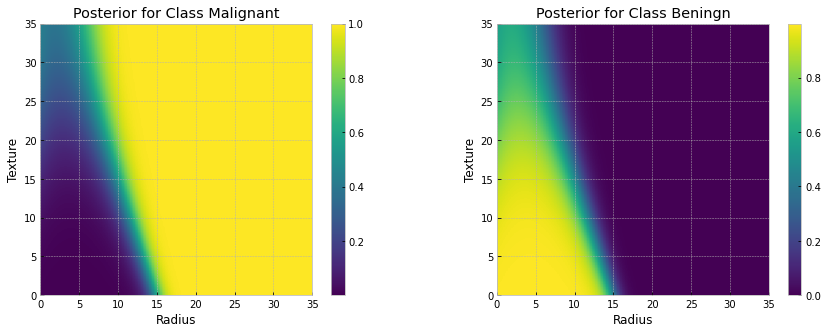

In [131]:
#the posterior distributions
pos1 = y1*p1 / (y1*p1 + y2*p2) 
pos2 = y2*p2 / (y1*p1 + y2*p2)
fig =plt.figure(figsize=(15,5)) 
fig.add_subplot(1,2,1)
plt.imshow(pos1, extent=[0,grid,0,grid]) 
plt.colorbar()
plt.xlabel('Radius'); 
plt.ylabel('Texture') 
plt.title('Posterior for Class Malignant')
fig.add_subplot(1,2,2)
plt.imshow(pos2, extent=[0,grid,0,grid]) 
plt.colorbar()
plt.xlabel('Radius'); 
plt.ylabel('Texture') 
plt.title('Posterior for Class Beningn');

/var/folders/sd/rhy8vt5d6pbgxs21z95g2qnw0000gn/T/ipykernel_1158/1105020610.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


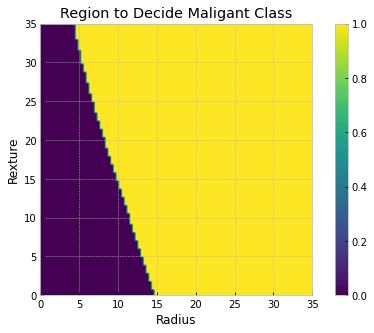

In [132]:
# Look at the decision boundary decide Malignant Class
plt.figure(figsize=(8,5))
plt.imshow( pos1 > pos2 , extent=[0,grid,0,grid]) 
plt.colorbar()
plt.xlabel('Radius'); 
plt.ylabel('Rexture') 
plt.title('Region to Decide Maligant Class');

In [133]:
# Decision for average radius of 18 and an average texture of 22 
x = [18,22]
# Data Likelihoods
y1_newPoint = stats.multivariate_normal.pdf(x, mean=mu1, cov=cov1) # P(x*|C1) 
y2_newPoint = stats.multivariate_normal.pdf(x, mean=mu2, cov=cov2) #P(x|C2)
print('Data likelihoods:')
print('P(x|C1) = ', y1_newPoint)
print('P(x|C2) = ', y2_newPoint,'\n')
# Posterior Probabilities
y1_pos = y1_newPoint*p1 / (y1_newPoint*p1 + y2_newPoint*p2) #P(C1|x) 
y2_pos = y2_newPoint*p2 / (y1_newPoint*p1 + y2_newPoint*p2) #P(C2|x)
print('Posterior probabilities:')
print('P(C1|x) = ', y1_pos)
print('P(C2|x) = ', y2_pos,'\n')
# Classification
if y1_pos > y2_pos:
    print('x = ',x,' belongs to Malignant Class')
    print('The confidence in decision of Malignant Class is ', y1_pos*100, '%')
else:
    print('x = ',x,' belongs to Benign Class')
    print('The confidence in decision of Benign Class is ', y2_pos*100, '%')
    

Data likelihoods:
P(x|C1) =  0.012984476229293579
P(x|C2) =  5.2267741180242404e-05 

Posterior probabilities:
P(C1|x) =  0.9976152655413405
P(C2|x) =  0.0023847344586594914 

x =  [18, 22]  belongs to Malignant Class
The confidence in decision of Malignant Class is  99.76152655413405 %


In [134]:
# Decision for radius of 30 and texture of 30 
x = [30,30]
# Data Likelihoods
y1_newPoint = stats.multivariate_normal.pdf(x, mean=mu1, cov=cov1) # P(x*|C1) 
y2_newPoint = stats.multivariate_normal.pdf(x, mean=mu2, cov=cov2) #P(x|C2)
print('Data likelihoods:')
print('P(x|C1) = ', y1_newPoint)
print('P(x|C2) = ', y2_newPoint,'\n')
# Posterior Probabilities
y1_pos = y1_newPoint*p1 / (y1_newPoint*p1 + y2_newPoint*p2) #P(C1|x) 
y2_pos = y2_newPoint*p2 / (y1_newPoint*p1 + y2_newPoint*p2) #P(C2|x)
print('Posterior probabilities:')
print('P(C1|x) = ', y1_pos)
print('P(C2|x) = ', y2_pos,'\n')
# Classification
if y1_pos > y2_pos:
    print('x = ',x,' belongs to Malignant Class')
    print('The confidence in decision of Malignant Class is ', y1_pos*100, '%')
else:
    print('x = ',x,' belongs to Benign Class')
    print('The confidence in decision of Benign Class is ', y2_pos*100, '%')

Data likelihoods:
P(x|C1) =  1.2054634203690502e-06
P(x|C2) =  1.0167210990312249e-26 

Posterior probabilities:
P(C1|x) =  1.0
P(C2|x) =  5.0085895684880355e-21 

x =  [30, 30]  belongs to Malignant Class
The confidence in decision of Malignant Class is  100.0 %
